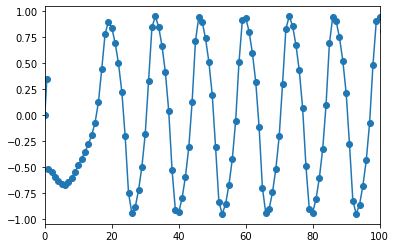

In [45]:
import numpy
import pandas
import matplotlib.pyplot as plt

d = pandas.read_csv('test.txt', header=None, sep=' +',engine='python').to_numpy()

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(d[:,0],d[:,1],'-o')
ax.set_xlim((0,100))
plt.show()

In [8]:
d

array([[1.00000000e+00, 9.99909204e-01],
       [2.00000000e+00, 9.99909122e-01],
       [3.00000000e+00, 9.99909204e-01],
       ...,
       [9.99900000e+03, 9.99909204e-01],
       [1.00000000e+04, 9.99909204e-01],
       [1.00010000e+04, 9.99909204e-01]])

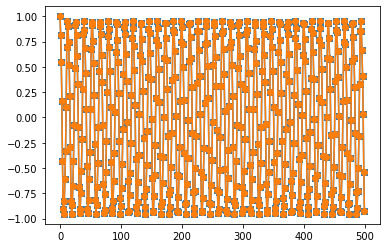

In [42]:
import math
from numba import jit

@jit(nopython=True)
def KTzTanh_map(x, K, T, d, l, xR, H):
    '''
    Função que traz as equações do modelo KTzTan:

    x(t+1) = Tanh[(x(t) - K*y(t) + z(t) + H + I)/T]
    y(t+1) = x(t)
    z(t+1) = (1 - d)*z(t) - l*(x(t) - xR)

    Aqui, y(t) = x(t-2) explicita a bidimensionalidade do problema; ambas as variáveis representam o potencial de 
    membrana. Os parâmetros K, T podem ser vistos como condutâncias, enquanto que H e I são correntes. A parte 
    responsável pela dinâmica lenta do modelo (3a equação) faz o sistema transitar entre as áreas de diferentes 
    comportamentos do diagrama de fases do modelo.

    - Entradas:
    x    -> vetor que contém as variáveis x, y e z
    K, T -> podem ser vistos como condutâncias
    d    -> controla o período refratário, período imediatamente após um spike (em que não se pode gerar outros spikes)
    l    -> controla o amortecimento das oscilações
    x_R  -> controla a dinâmica dos bursts
    H    -> corrente externa
    I    -> corrente externa + sináptica

    - Saídas:
    x -> vetor que contém as variáveis x, y e z, após processar os estímulos dados ao neurônio
    '''

    arg = (x[0] - K*x[1] + x[2] + H)/T
    x[1] = x[0] #x[i] é um vetor de entradas (x, y, z) 
    x[2] = (1.0-d)*x[2] - l * (x[0] - xR)
    x[0] = 2.0 / (1.0 + my_exp(-2.0*arg)) - 1.0
    return x


@jit(nopython=True)
def my_tanh(x):
    return 2.0 / (1.0 + my_exp(-2.0*x)) - 1.0

@jit(nopython=True)
def my_exp(x): #definimos essa função para evitar o erro de overflow
    return math.exp(x) if x < 709.782712893384 else numpy.inf


def KTzTanhIter(xAnt, K, T, d, l, xR, H):
    x    = xAnt.copy()
    x[1] = xAnt[0]
    x[2] = (1.0 - d) * xAnt[2] - l * (xAnt[0] - xR)
    x[0] = my_tanh((xAnt[0] - K * xAnt[1] + xAnt[2] + H) / T)
    return x

K  = 0.6
T  = 0.35
d  = 0.0
l  = 0.0
xR = 0.0
H  = 0.0
t_total  = 500
t_values  = numpy.arange(t_total)
x1_values = numpy.zeros(t_total)
x2_values = numpy.zeros(t_total)

x1 = numpy.array([1.0,1.0,0.0])
x2 = numpy.array([1.0,1.0,0.0])
for t in t_values:
    x1 = KTzTanhIter(x1, K, T, d, l, xR, H)
    x2 = KTzTanh_map(x2, K, T, d, l, xR, H)
    x1_values[t] = x1[1]
    x2_values[t] = x2[1]


fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(t_values,x2_values,'-s')
ax.plot(t_values,x1_values,'-o')

plt.show()

In [22]:
x1_values

array([-0.9993293 , -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99932827,
       -0.99932827, -0.99932827, -0.99932827, -0.99932827, -0.99